In [2]:
import torch
import torch.nn as nn
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt
from einops import rearrange

In [3]:
image = Image.open('./tests/cat.jpg')

In [8]:
transforms = T.Compose([
    T.Resize((512,512)),
    T.ToTensor()
])

In [9]:
img = transforms(image)

In [25]:
img.shape

torch.Size([3, 512, 512])

In [44]:
num_patches = 512//128
num_patches**2

16

In [27]:
main_patches = rearrange(img, 'c (a h) (b w) -> c (a b) h w',a=4,b=4)

In [28]:
main_patches.shape

torch.Size([3, 16, 128, 128])

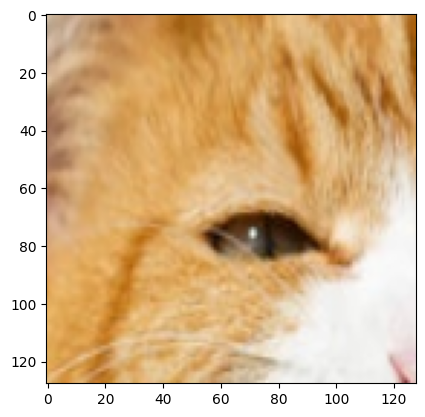

In [40]:
plt.imshow(main_patches[:,5,:,:].permute(1,2,0))

In [66]:
def pixel_shuffle(x):
    scale_factor = 6
    bsz, seq, embed_dim = x.size()
    height = width = int(seq**0.5)
    x = x.view(bsz, height, width, embed_dim)
    x = x.view(bsz, height, int(width / scale_factor), embed_dim * scale_factor)
    x = x.permute(0, 2, 1, 3)
    x = x.reshape(bsz, int(width / scale_factor), int(height / scale_factor), embed_dim * (scale_factor**2))
    x = x.permute(0, 2, 1, 3)
    x = x.reshape(bsz, int(seq / (scale_factor**2)), embed_dim * (scale_factor**2))
    return x

In [67]:
pixel_shuffle(torch.rand(1,576,576)).shape

torch.Size([1, 16, 20736])

In [58]:
(384/16)**2

576.0